# Stock Price Prediction Using Linear Regression

##### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

Loading the training dataset

In [2]:
google = pd.read_csv('Google_test_data.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


Summary of the dataset

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


Preprocessing the data

In [4]:
google['Date'] = pd.to_datetime(google['Date'])

In [5]:
print(f'Dataframe contains stock prices between {google.Date.min()} {google.Date.max()}') 
print(f'Total days = {(google.Date.max()  - google.Date.min()).days} days')

Dataframe contains stock prices between 2018-08-13 00:00:00 2019-08-13 00:00:00
Total days = 365 days


In [6]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1131.925615,1143.037319,1120.368111,1131.963092,1131.963092,1.613059e+06
std,64.187732,61.947013,66.312745,64.872818,64.872818,7.319624e+05
min,973.900024,1003.539978,970.109985,976.219971,976.219971,6.915000e+05
25%,1079.867493,1092.682464,1068.087525,1079.680023,1079.680023,1.202525e+06
50%,1130.579956,1141.875000,1119.025024,1132.075012,1132.075012,1.436500e+06
75%,1185.037506,1193.165039,1171.849976,1184.837524,1184.837524,1.837200e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,1287.579956,6.207000e+06


<AxesSubplot: >

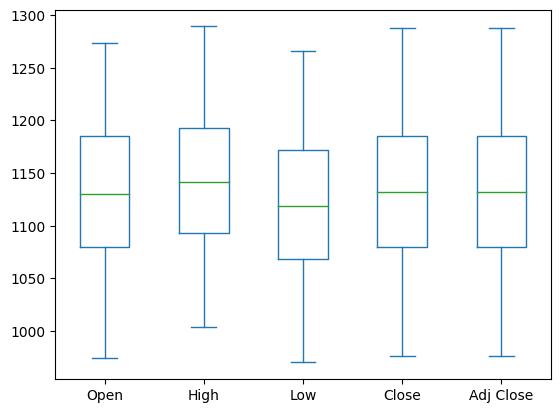

In [7]:
google[['Open','High','Low','Close','Adj Close']].plot(kind='box')

Layout Selection for the plot

In [8]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Google',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

Importing more libraries

In [9]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

Split the data into train and test sets

In [10]:
X = np.array(google.index).reshape(-1,1)
Y = google['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

Feature Scaling

In [11]:
scaler = StandardScaler().fit(X_train)

In [12]:
from sklearn.linear_model import LinearRegression

Creating a Linear Model

In [13]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

Plot actual and predicted values for train dataset using Linear Regression

In [14]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
google_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=google_data, layout=layout)

In [15]:
plot2.show()

Calculate scores for model evaluation

In [16]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.01231554493546505	0.01166086633353891
MSE       4103.702123160195	4223.731803577232



End